In [242]:
import pandas as pd

In [243]:
df = pd.read_csv("Arrest_Data_from_2020_to_Present_20240915.csv")

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293238 entries, 0 to 293237
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Report ID                 293238 non-null  int64  
 1   Report Type               293238 non-null  object 
 2   Arrest Date               293238 non-null  object 
 3   Time                      293221 non-null  float64
 4   Area ID                   293238 non-null  int64  
 5   Area Name                 293238 non-null  object 
 6   Reporting District        293238 non-null  int64  
 7   Age                       293238 non-null  int64  
 8   Sex Code                  293238 non-null  object 
 9   Descent Code              293238 non-null  object 
 10  Charge Group Code         267490 non-null  float64
 11  Charge Group Description  267447 non-null  object 
 12  Arrest Type Code          293237 non-null  object 
 13  Charge                    293238 non-null  o

In [245]:
df.columns

Index(['Report ID', 'Report Type', 'Arrest Date', 'Time', 'Area ID',
       'Area Name', 'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Disposition Description', 'Address',
       'Cross Street', 'LAT', 'LON', 'Location', 'Booking Date',
       'Booking Time', 'Booking Location', 'Booking Location Code'],
      dtype='object')

## Analysis Goals
- [x] **Arrest Trends Over Time**: How the number of arrests has changed month-by-month or year-by-year.
    - [x] **Seasonal Variations**: How arrest rates vary with seasons or weather conditions.
    - [x] **Days of Week**: The most frequent charges leading to arrests.
    - [x] **Time of Day**: The most common times of day when arrests occur.
- [x] **Geographic Distribution of Arrests**: Areas in Los Angeles with the highest and lowest arrest rates.
- [x] **Common Charges**: The most frequent charges leading to arrests.
- [x] **Demographics of Arrestees**:
    - [x] **Gender**
    - [x] **Age**
    - [x] **Race**

In [246]:
# Droping useless columns.
df = df.drop(["Report ID", "Report Type", "Reporting District", "Area Name", "Charge Group Description", "Address", "Cross Street", "Location", "Charge", "Charge Description", "Disposition Description", "Booking Date", "Booking Time", "Booking Location Code", "Booking Location"], axis=1)

In [247]:
df

,Arrest Date,Time,Area ID,Age,Sex Code,Descent Code,Charge Group Code,Arrest Type Code,LAT,LON
0,07/13/2023 12:00:00 AM,2330.0,14,29,M,H,NaN,I,33.9908,-118.4765
1,09/01/2023 12:00:00 AM,2300.0,17,17,F,H,NaN,M,34.2682,-118.4760
2,07/14/2023 12:00:00 AM,2150.0,6,30,M,O,13.0,M,34.0845,-118.3091
3,09/13/2023 12:00:00 AM,1332.0,1,50,M,A,NaN,M,34.0421,-118.2405
4,07/04/2023 12:00:00 AM,1445.0,2,38,M,H,NaN,I,34.0539,-118.2756
...,...,...,...,...,...,...,...,...,...,...
293233,06/23/2024 12:00:00 AM,1720.0,11,39,M,H,4.0,F,34.1245,-118.1993
293234,06/13/2024 12:00:00 AM,1615.0,1,44,M,H,24.0,F,34.0626,-118.2445
293235,06/27/2024 12:00:00 AM,945.0,1,37,M,W,NaN,M,34.0488,-118.2518
293236,06/21/2024 12:00:00 AM,935.0,8,58,M,W,NaN,I,34.0411,-118.4619


<Figure size 640x480 with 0 Axes>

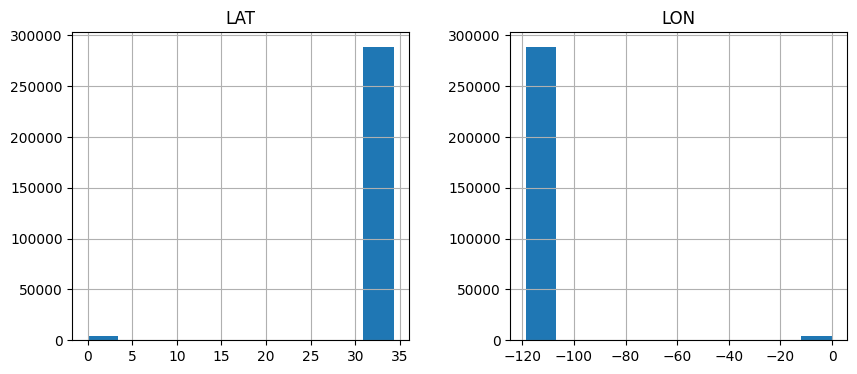

In [248]:
import matplotlib.pyplot as plt
plt.tight_layout()
df[["LAT", "LON"]].hist(figsize=(10, 4))
# Considering the these, these are also useless as location data. We will drop these too.
df.drop(["LAT", "LON"], axis=1, inplace=True)

In [249]:
df

,Arrest Date,Time,Area ID,Age,Sex Code,Descent Code,Charge Group Code,Arrest Type Code
0,07/13/2023 12:00:00 AM,2330.0,14,29,M,H,NaN,I
1,09/01/2023 12:00:00 AM,2300.0,17,17,F,H,NaN,M
2,07/14/2023 12:00:00 AM,2150.0,6,30,M,O,13.0,M
3,09/13/2023 12:00:00 AM,1332.0,1,50,M,A,NaN,M
4,07/04/2023 12:00:00 AM,1445.0,2,38,M,H,NaN,I
...,...,...,...,...,...,...,...,...
293233,06/23/2024 12:00:00 AM,1720.0,11,39,M,H,4.0,F
293234,06/13/2024 12:00:00 AM,1615.0,1,44,M,H,24.0,F
293235,06/27/2024 12:00:00 AM,945.0,1,37,M,W,NaN,M
293236,06/21/2024 12:00:00 AM,935.0,8,58,M,W,NaN,I


In [250]:
# Convert 'Time' to a proper time format
# First, convert 'Time' to string and pad with zeros if necessary
# df['Time'] = df['Time'].astype(str).str.zfill(5)

# Convert 'Time' to HH:MM format
# df['Time'] = df['Time'].apply(lambda x: x[:2] + ':' + x[2:4])

# Convert 'Arrest Date' to datetime format
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'], errors='coerce')

# Remove rows with 'Arrest Date' in 2024
df = df[df['Arrest Date'].dt.year != 2024]

C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\2745533934.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrest Date'] = pd.to_datetime(df['Arrest Date'], errors='coerce')


C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\1859452834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrest Date'] = pd.to_datetime(df['Arrest Date'], errors='coerce')


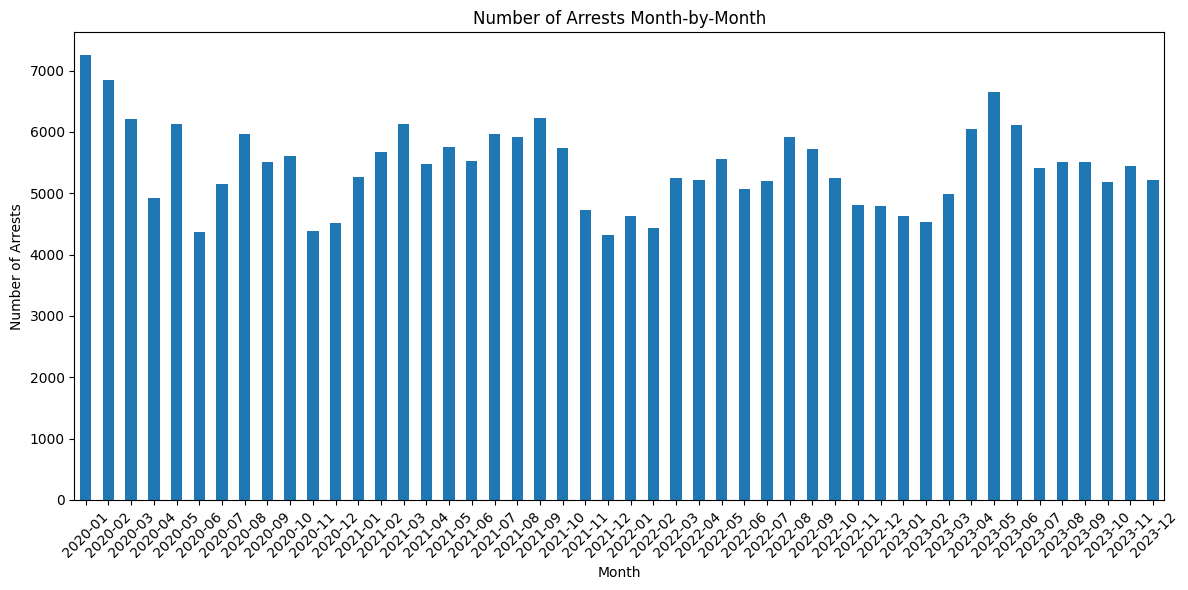

In [168]:
# Convert 'Arrest Date' to datetime
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Arrest Date'])

# Extract month and year from 'Arrest Date'
df['YearMonth'] = df['Arrest Date'].dt.to_period('M')

# Group by 'YearMonth' and count the number of arrests
monthly_arrests = df.groupby('YearMonth').size()

# Plot the number of arrests month-by-month
plt.figure(figsize=(12, 6))
monthly_arrests.plot(kind='bar')
plt.title('Number of Arrests Month-by-Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\29578483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Arrest Date'].dt.year


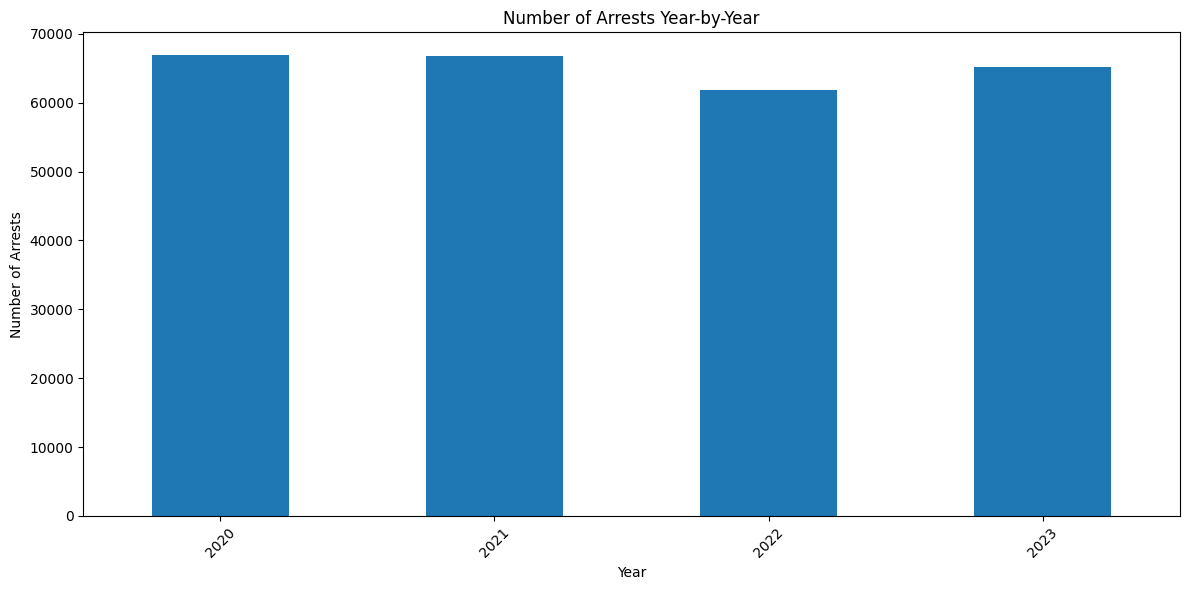

done


In [251]:
# Extract year from 'Arrest Date'
df['Year'] = df['Arrest Date'].dt.year

# Group by 'Year' and count the number of arrests
yearly_arrests = df.groupby('Year').size()

# Plot the number of arrests by year
plt.figure(figsize=(12, 6))
yearly_arrests.plot(kind='bar')
plt.title('Number of Arrests Year-by-Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('done')

C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\452269446.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Arrest Date'].apply(get_season)


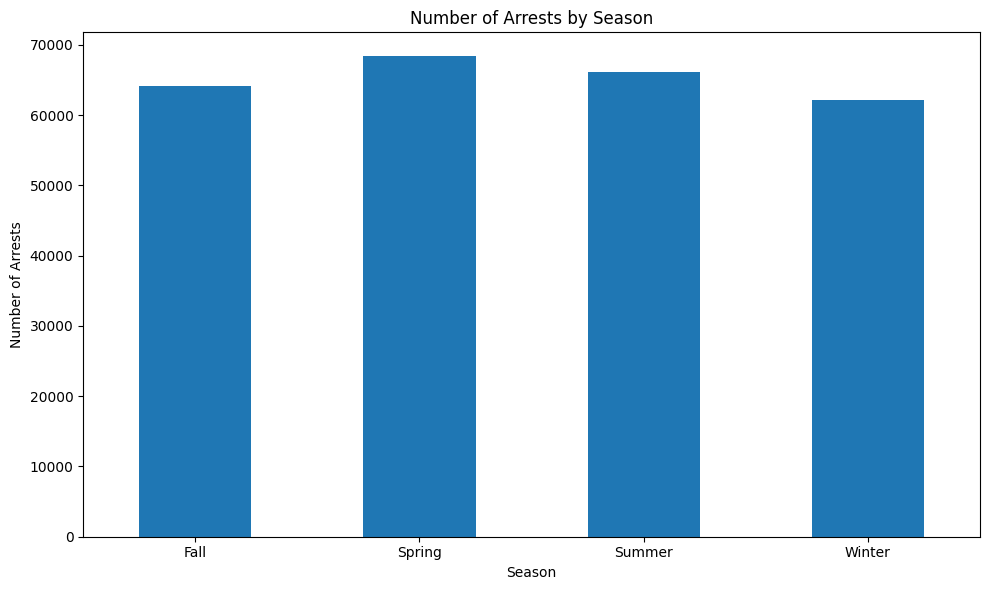

In [252]:
# Now let's see the changes by seasons.
# Define a function to categorize seasons
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'Season' column
df['Season'] = df['Arrest Date'].apply(get_season)

# Group by 'Season' and count the number of arrests
seasonal_arrests = df.groupby('Season').size()

# Plot the number of arrests by season
plt.figure(figsize=(10, 6))
# seasonal_arrests.plot(kind='pie')
seasonal_arrests.plot(kind='bar')
plt.title('Number of Arrests by Season')
plt.xlabel('Season')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\2478607671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day of Week'] = df['Arrest Date'].dt.day_name()


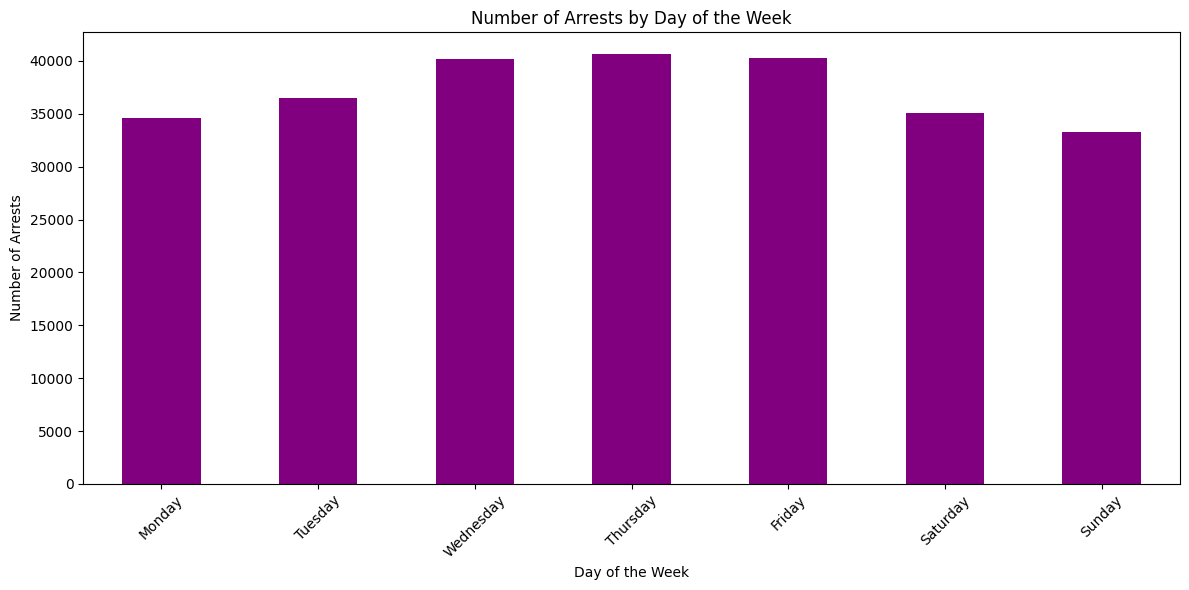

In [253]:
# Extract day of the week from 'Arrest Date'
df['Day of Week'] = df['Arrest Date'].dt.day_name()

# Group by 'Day of Week' and count the number of arrests
day_of_week_arrests = df.groupby('Day of Week').size()

# Sort the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_arrests = day_of_week_arrests.reindex(ordered_days)

# Plot the number of arrests by day of the week
plt.figure(figsize=(12, 6))
day_of_week_arrests.plot(kind='bar', color='purple')
plt.title('Number of Arrests by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [254]:
df

,Arrest Date,Time,Area ID,Age,Sex Code,Descent Code,Charge Group Code,Arrest Type Code,Year,Season,Day of Week
0,2023-07-13,2330.0,14,29,M,H,NaN,I,2023,Summer,Thursday
1,2023-09-01,2300.0,17,17,F,H,NaN,M,2023,Fall,Friday
2,2023-07-14,2150.0,6,30,M,O,13.0,M,2023,Summer,Friday
3,2023-09-13,1332.0,1,50,M,A,NaN,M,2023,Fall,Wednesday
4,2023-07-04,1445.0,2,38,M,H,NaN,I,2023,Summer,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
292259,2023-12-17,2215.0,4,46,M,B,8.0,M,2023,Winter,Sunday
292281,2023-05-28,1645.0,6,44,M,B,16.0,F,2023,Spring,Sunday
292588,2023-11-04,1930.0,1,30,M,O,24.0,F,2023,Fall,Saturday
292776,2023-08-15,1430.0,18,35,M,B,8.0,F,2023,Summer,Tuesday


C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\2732825851.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(transform_time)
C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\2732825851.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Time'].str[:2].astype(int)
C:\Users\Pizza\AppData\Local\Temp\ipykernel_17012\2732825851.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=hourly_arrests.index, 

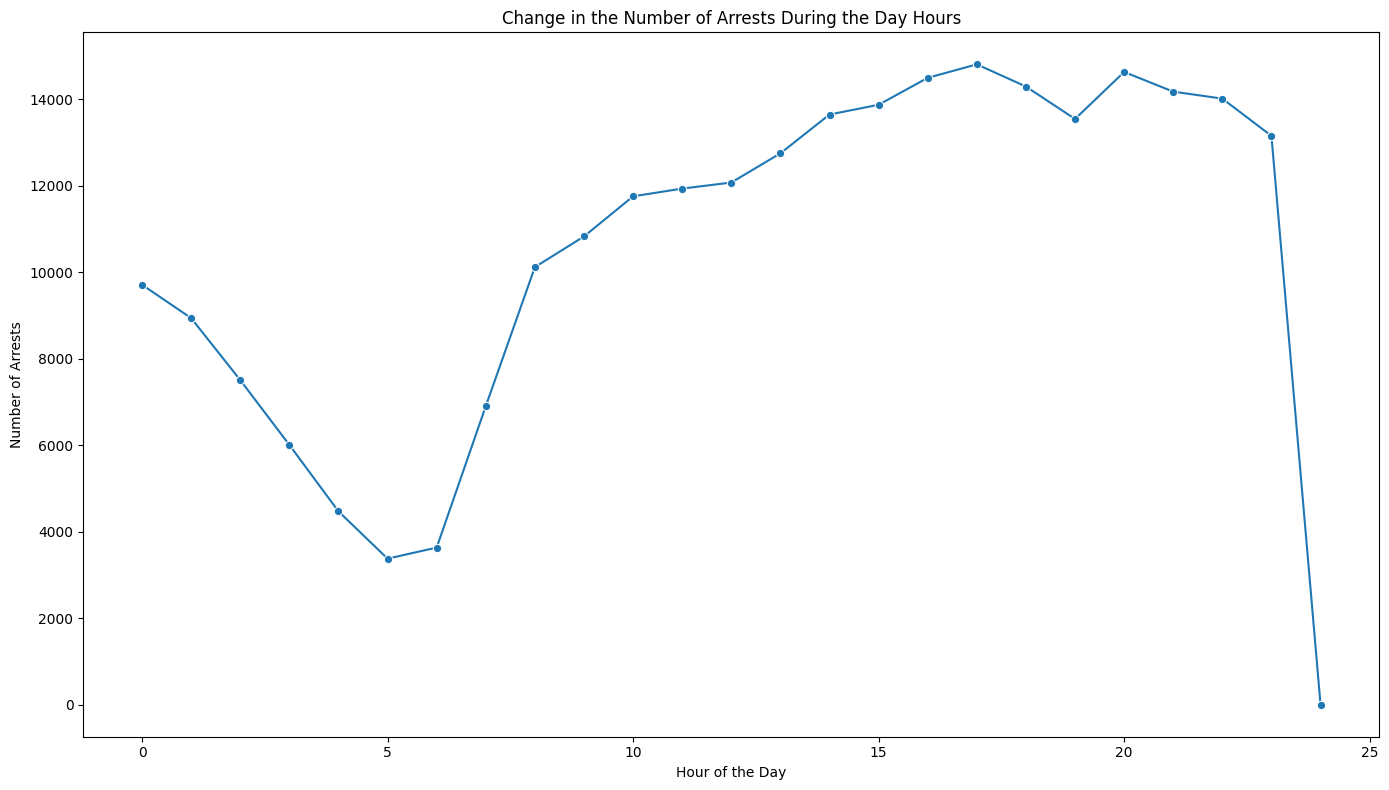

In [255]:
import pandas as pd

def transform_time_column(df, column_name):
    def transform_time(num):
        # Convert the number to an integer to remove decimal points
        num_int = int(num)
        
        # Convert the integer to a string
        num_str = str(num_int)
        
        # Pad with leading zeros if necessary to ensure 4 digits
        num_str = num_str.zfill(4)
        
        # Format as HH:MM
        hours = num_str[:2]
        minutes = num_str[2:]
        return f"{hours}:{minutes}"

    # Check if the column exists
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame")
    
    # Apply the transformation
    df[column_name] = df[column_name].apply(transform_time)
    return df

# Transform the DataFrame
df = df.dropna(subset = "Time")
df = transform_time_column(df, 'Time')
# Group by 'Hour' and count the number of arrests
# Extract hour from 'Time'
df['Hour'] = df['Time'].str[:2].astype(int)
hourly_arrests = df.groupby('Hour').size()

# Plot the change in the number of arrests during the day hours
plt.figure(figsize=(14, 8))
sns.lineplot(x=hourly_arrests.index, y=hourly_arrests.values, marker='o', palette='viridis')
plt.title('Change in the Number of Arrests During the Day Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Arrests')
plt.tight_layout()
plt.show()

In [256]:
df

,Arrest Date,Time,Area ID,Age,Sex Code,Descent Code,Charge Group Code,Arrest Type Code,Year,Season,Day of Week,Hour
0,2023-07-13,23:30,14,29,M,H,NaN,I,2023,Summer,Thursday,23
1,2023-09-01,23:00,17,17,F,H,NaN,M,2023,Fall,Friday,23
2,2023-07-14,21:50,6,30,M,O,13.0,M,2023,Summer,Friday,21
3,2023-09-13,13:32,1,50,M,A,NaN,M,2023,Fall,Wednesday,13
4,2023-07-04,14:45,2,38,M,H,NaN,I,2023,Summer,Tuesday,14
...,...,...,...,...,...,...,...,...,...,...,...,...
292259,2023-12-17,22:15,4,46,M,B,8.0,M,2023,Winter,Sunday,22
292281,2023-05-28,16:45,6,44,M,B,16.0,F,2023,Spring,Sunday,16
292588,2023-11-04,19:30,1,30,M,O,24.0,F,2023,Fall,Saturday,19
292776,2023-08-15,14:30,18,35,M,B,8.0,F,2023,Summer,Tuesday,14


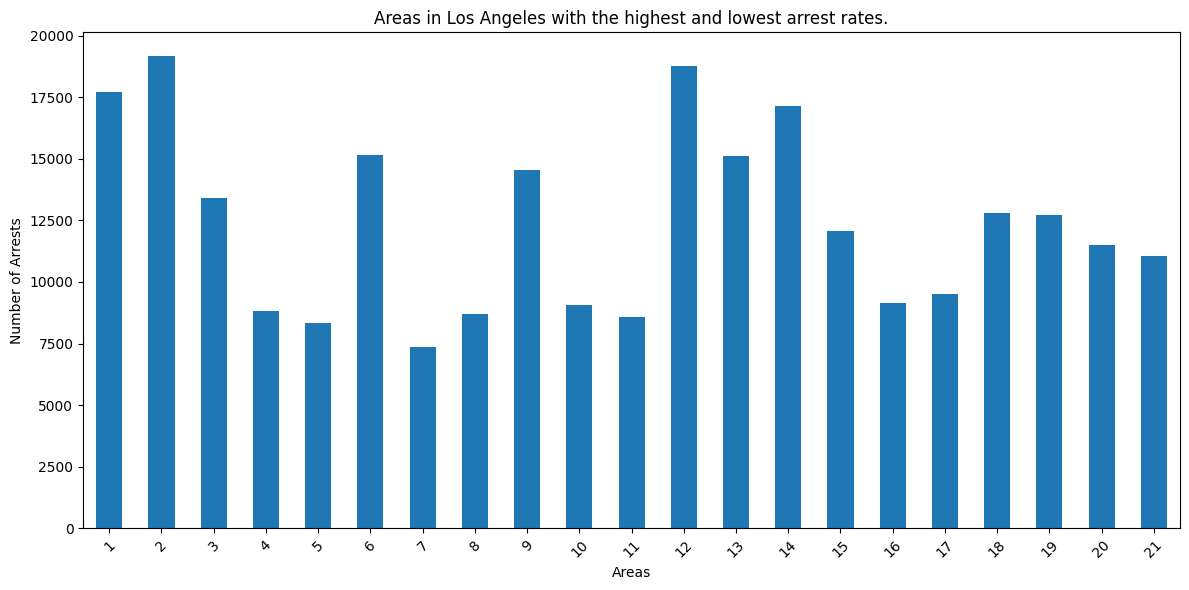

done


In [257]:
# Group by 'Year' and count the number of arrests
yearly_arrests = df.groupby('Area ID').size()

# Plot the number of arrests by year
plt.figure(figsize=(12, 6))
yearly_arrests.plot(kind='bar')
plt.title('Areas in Los Angeles with the highest and lowest arrest rates.')
plt.xlabel('Areas')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('done')

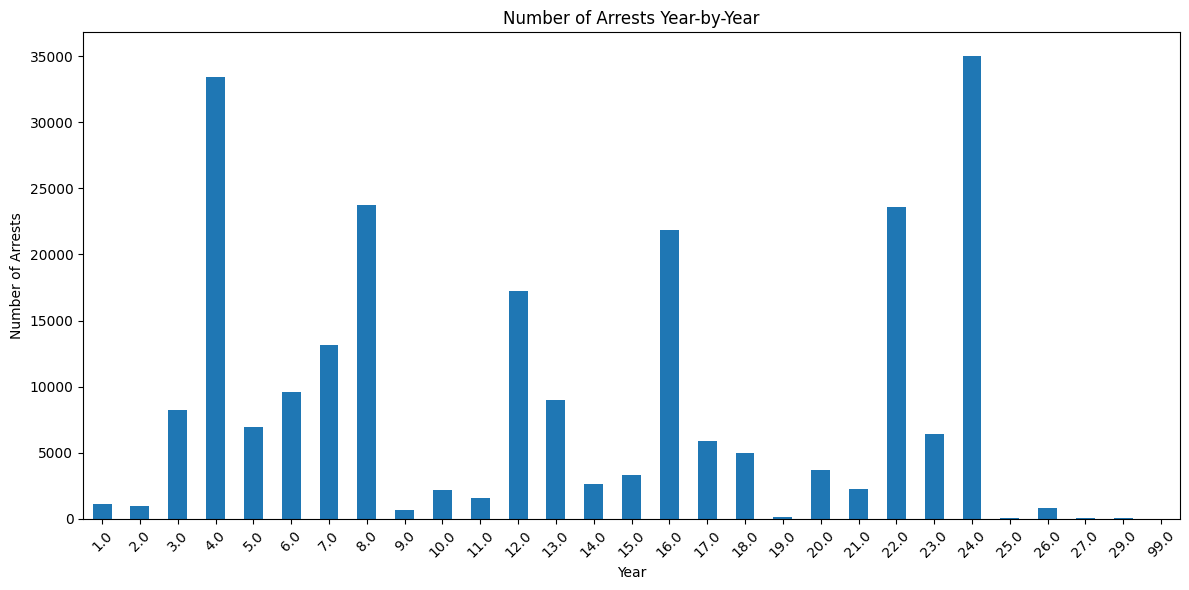

done


In [258]:
# Drop rows with invalid dates
df = df.dropna(subset=['Charge Group Code'])
# Group by 'Year' and count the number of arrests
yearly_arrests = df.groupby('Charge Group Code').size()

# Plot the number of arrests by year
plt.figure(figsize=(12, 6))
yearly_arrests.plot(kind='bar')
plt.title('Number of Arrests Year-by-Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('done')

In [259]:
df

,Arrest Date,Time,Area ID,Age,Sex Code,Descent Code,Charge Group Code,Arrest Type Code,Year,Season,Day of Week,Hour
2,2023-07-14,21:50,6,30,M,O,13.0,M,2023,Summer,Friday,21
8,2023-11-10,10:30,8,40,M,H,7.0,M,2023,Fall,Friday,10
19,2023-09-08,10:00,17,63,M,H,20.0,M,2023,Fall,Friday,10
24,2023-07-14,21:17,7,24,F,B,6.0,M,2023,Summer,Friday,21
25,2023-07-15,20:20,15,42,M,H,12.0,F,2023,Summer,Saturday,20
...,...,...,...,...,...,...,...,...,...,...,...,...
292259,2023-12-17,22:15,4,46,M,B,8.0,M,2023,Winter,Sunday,22
292281,2023-05-28,16:45,6,44,M,B,16.0,F,2023,Spring,Sunday,16
292588,2023-11-04,19:30,1,30,M,O,24.0,F,2023,Fall,Saturday,19
292776,2023-08-15,14:30,18,35,M,B,8.0,F,2023,Summer,Tuesday,14


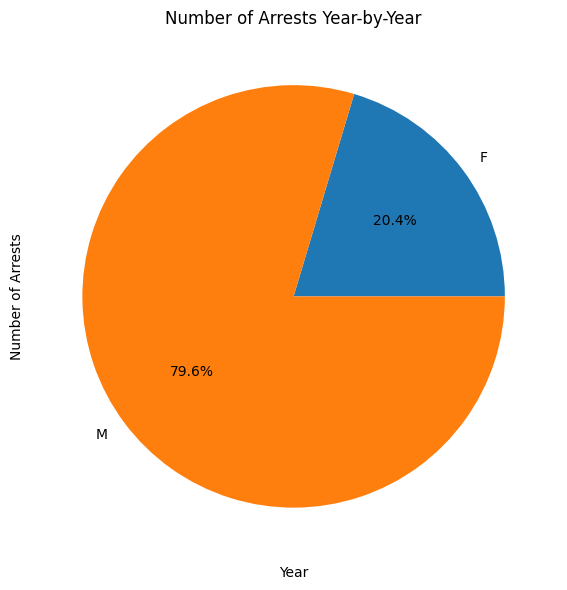

done


In [260]:
# Drop rows with invalid dates
df = df.dropna(subset=['Sex Code'])
# Group by 'Year' and count the number of arrests
yearly_arrests = df.groupby('Sex Code').size()

# Plot the number of arrests by year
plt.figure(figsize=(12, 6))
yearly_arrests.plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Arrests Year-by-Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('done')

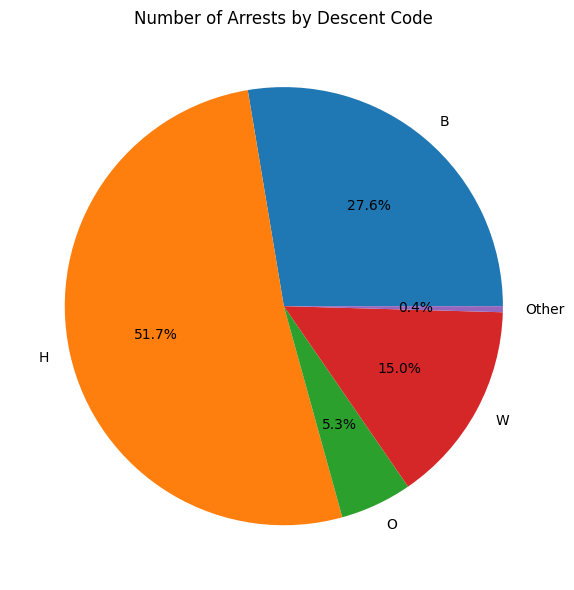

done


In [261]:
# Drop rows with invalid dates
df = df.dropna(subset=['Descent Code'])
# Group by 'Year' and count the number of arrests
yearly_arrests = df.groupby('Descent Code').size()

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop rows with invalid 'Descent Code'
df = df.dropna(subset=['Descent Code'])

# Group by 'Descent Code' and count the number of arrests
yearly_arrests = df.groupby('Descent Code').size()

# Calculate the percentage of each category
percentages = yearly_arrests / yearly_arrests.sum() * 100

# Separate the categories into main and others
main_categories = percentages[percentages >= 5]
other_categories = percentages[percentages < 5]

# Sum the smaller categories into 'Other'
if not other_categories.empty:
    main_categories['Other'] = other_categories.sum()

# Plot the pie chart with percentages
plt.figure(figsize=(12, 6))
main_categories.plot(kind='pie', autopct='%1.1f%%')

# Set the title and labels
plt.title('Number of Arrests by Descent Code')
plt.ylabel('')  # Remove the y-label
plt.xlabel('')  # Remove the x-label
plt.tight_layout()
plt.show()

print('done')

In [262]:
df["Descent Code"].value_counts()

Descent Code
H    123427
B     66018
W     35731
O     12654
A       560
C       136
F       127
K       108
G        34
X        23
P        20
I        20
J        15
Z         4
U         4
S         4
D         2
V         2
L         1
Name: count, dtype: int64


Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [263]:
df

,Arrest Date,Time,Area ID,Age,Sex Code,Descent Code,Charge Group Code,Arrest Type Code,Year,Season,Day of Week,Hour
2,2023-07-14,21:50,6,30,M,O,13.0,M,2023,Summer,Friday,21
8,2023-11-10,10:30,8,40,M,H,7.0,M,2023,Fall,Friday,10
19,2023-09-08,10:00,17,63,M,H,20.0,M,2023,Fall,Friday,10
24,2023-07-14,21:17,7,24,F,B,6.0,M,2023,Summer,Friday,21
25,2023-07-15,20:20,15,42,M,H,12.0,F,2023,Summer,Saturday,20
...,...,...,...,...,...,...,...,...,...,...,...,...
292259,2023-12-17,22:15,4,46,M,B,8.0,M,2023,Winter,Sunday,22
292281,2023-05-28,16:45,6,44,M,B,16.0,F,2023,Spring,Sunday,16
292588,2023-11-04,19:30,1,30,M,O,24.0,F,2023,Fall,Saturday,19
292776,2023-08-15,14:30,18,35,M,B,8.0,F,2023,Summer,Tuesday,14


In [264]:
# Now I am going to make a good df to get corr
pd.get_dummies(df["Sex Code"], dtype=int)

,F,M
2,0,1
8,0,1
19,0,1
24,1,0
25,0,1
...,...,...
292259,0,1
292281,0,1
292588,0,1
292776,0,1


In [265]:
pd.get_dummies(df["Descent Code"], dtype=int)

,A,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,X,Z
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292259,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
292281,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
292588,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
292776,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [266]:
pd.get_dummies(df["Arrest Type Code"], dtype=int)

,D,F,I,M,O
2,0,0,0,1,0
8,0,0,0,1,0
19,0,0,0,1,0
24,0,0,0,1,0
25,0,1,0,0,0
...,...,...,...,...,...
292259,0,0,0,1,0
292281,0,1,0,0,0
292588,0,1,0,0,0
292776,0,1,0,0,0


In [268]:
import pandas as pd

# Assuming df is your DataFrame
df_for_corr = pd.concat([
    df.drop(["Charge Group Code","Hour", "Arrest Type Code", "Descent Code", "Sex Code", "Day of Week", "Season", "Year", "Area ID", "Time", "Arrest Date"], axis=1),
    pd.get_dummies(df["Arrest Type Code"], dtype=int).add_prefix("AType_"),
    pd.get_dummies(df["Area ID"], dtype=int).add_prefix("D_"),
    pd.get_dummies(df["Sex Code"], dtype=int),
    pd.get_dummies(df["Day of Week"], dtype=int),
    pd.get_dummies(df["Season"], dtype=int)
], axis=1)

In [231]:
df_for_corr

,Age,AType_D,AType_F,AType_I,AType_M,AType_O,D_1,D_2,D_3,D_4,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
2,30,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,40,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19,63,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,24,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25,42,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292259,46,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
292281,44,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
292588,30,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
292776,35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [269]:
df_for_corr.corr()

,Age,AType_D,AType_F,AType_I,AType_M,AType_O,D_1,D_2,D_3,D_4,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
Age,1.000000,-0.125902,-0.081059,0.109136,0.055243,-0.001481,0.042784,-0.002764,-0.008412,-0.022899,...,0.005870,-0.009502,-0.010479,-0.002550,0.012891,0.011050,0.008659,-0.007619,0.006899,-0.007899
AType_D,-0.125902,1.000000,-0.061440,-0.011790,-0.052421,-0.005671,-0.009483,-0.004965,0.005051,0.004145,...,0.001373,-0.002014,-0.007202,0.000196,0.002613,0.003979,0.001471,0.002997,-0.002992,-0.001510
AType_F,-0.081059,-0.061440,1.000000,-0.203346,-0.904095,-0.097798,-0.011180,-0.017636,0.079156,0.042874,...,0.014010,-0.004447,0.014748,-0.005775,0.013586,0.000507,0.002121,-0.004833,0.016442,-0.013910
AType_I,0.109136,-0.011790,-0.203346,1.000000,-0.173499,-0.018768,-0.025046,0.157016,-0.042514,-0.029981,...,0.004763,-0.022086,-0.006508,-0.006393,0.002225,0.011026,0.006851,0.014921,0.006062,-0.028384
AType_M,0.055243,-0.052421,-0.904095,-0.173499,1.000000,-0.083443,0.021603,-0.041628,-0.062959,-0.036024,...,-0.015005,0.014567,-0.009493,0.006779,-0.015356,-0.006396,-0.003258,-0.001561,-0.017258,0.022451
AType_O,-0.001481,-0.005671,-0.097798,-0.018768,-0.083443,1.000000,0.002152,-0.001095,-0.005975,0.020044,...,-0.005836,-0.007236,-0.010609,0.007737,0.002602,0.006209,-0.008870,0.001854,-0.006749,0.013880
D_1,0.042784,-0.009483,-0.011180,-0.025046,0.021603,0.002152,1.000000,-0.069220,-0.065554,-0.051870,...,0.003647,-0.002437,-0.002033,-0.003866,0.008065,-0.001995,0.006796,-0.011978,-0.013318,0.019037
D_2,-0.002764,-0.004965,-0.017636,0.157016,-0.041628,-0.001095,-0.069220,1.000000,-0.060259,-0.047681,...,-0.001838,-0.004112,0.000567,0.009594,-0.001839,-0.004317,0.012004,0.003036,-0.000685,-0.014483
D_3,-0.008412,0.005051,0.079156,-0.042514,-0.062959,-0.005975,-0.065554,-0.060259,1.000000,-0.045156,...,-0.000331,0.002449,0.011026,-0.000525,-0.003041,-0.002722,-0.000885,0.001954,-0.002579,0.001508
D_4,-0.022899,0.004145,0.042874,-0.029981,-0.036024,0.020044,-0.051870,-0.047681,-0.045156,1.000000,...,-0.004156,0.007571,0.003798,-0.003872,-0.004449,-0.002295,-0.001808,-0.000659,0.000140,0.002352


<Axes: >

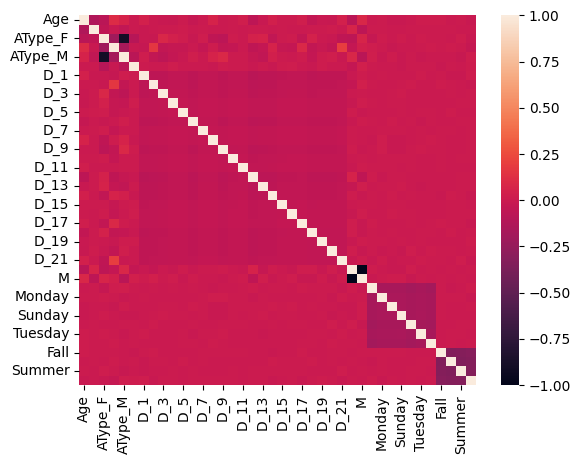

In [270]:
import seaborn as sns
sns.heatmap(df_for_corr.corr())

<Axes: >

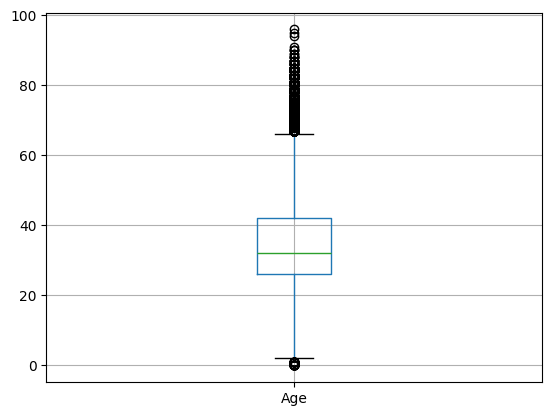

In [271]:
df.boxplot(["Age"])

In [272]:
import pandas as pd

def count_outliers(df, column):
    # Calculate the first (Q1) and third quartiles (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Return the number of outliers
    return outliers.shape[0]

outliers_count = count_outliers(df, 'Age')
print(f"Number of outliers: {outliers_count}")


Number of outliers: 2952
